# CUSTOMER SEGMENTATION USING RFM SCORE ANALYSIS

STEP 1 - IMPORT THE LIBRARIES

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date as dt

STEP 2 - LOAD AND READ THE DATASET

In [118]:
customer_data = pd.read_csv("/Users/rajalakshmishanmuganathan/Downloads/customer_segmentation 2.csv")

In [119]:
customer_data.sample(3)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
114452,114452,546013,21989,PACK OF 20 SKULL PAPER NAPKINS,1,3/8/2011 16:38,0.85,16495.0,United Kingdom
5130,5130,536845,21114,LAVENDER SCENTED FABRIC HEART,1,12/2/2010 19:18,1.25,17961.0,United Kingdom
147111,147111,549054,22191,IVORY DINER WALL CLOCK,4,4/6/2011 10:21,8.50,17719.0,United Kingdom


CLEANING THE DATASET

In [120]:
customer_data.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [121]:
# checking the shape
row , col = customer_data.shape
print(f'There are {row} rows and {col} columns in the dataset(before cleaning!)')

There are 541909 rows and 9 columns in the dataset(before cleaning!)


In [122]:
# checking the missing percentage
total_cells = row * col
missing_cells = customer_data.isna().sum()
total_missing = missing_cells.sum()
missing_percent = (total_missing / total_cells) * 100
print(f'The percentage of missingness in the dataset is: {missing_percent}')

The percentage of missingness in the dataset is: 2.7994450072695685


In [123]:
# finding the pattern of missingness
missing_values = customer_data.isnull().sum(axis=1)
for n in missing_values.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NaN values are found in:")
        n_miss_per_col = customer_data[missing_values == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

For the rows with exactly 1 missing values, NaN values are found in:
CustomerID    133626
dtype: int64



For the rows with exactly 2 missing values, NaN values are found in:
Description    1454
CustomerID     1454
dtype: int64





In [124]:
# removing the values
customer_data.dropna(axis = 0, inplace = True)

In [125]:
row1, col1 = customer_data.shape
print(f'There are {row1} rows and {col1} columns in the dataset(after cleaning!)')

There are 406829 rows and 9 columns in the dataset(after cleaning!)


FORMATTING THE DATASET

In [126]:
customer_data.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [127]:
customer_data.dtypes

index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [128]:
#changing the datatypes
cols_to_change = ['InvoiceNo', 'StockCode', 'Description', 'Country']
for cols in cols_to_change:
    customer_data [cols] = customer_data[cols].astype("string")
customer_data['InvoiceDate'] = pd.to_datetime(customer_data['InvoiceDate'])

CREATING A NEW COLUMN 'TOTAL AMOUNT'

In [129]:
customer_data['TotalAmount'] = customer_data['Quantity'] * customer_data['UnitPrice']

FINDING THE LATEST DATE OF TRANSACTION

In [130]:
latest_date = customer_data['InvoiceDate'].max()
print(f'The latest date: {latest_date}')

The latest date: 2011-12-09 12:50:00


ENTERING THE DATE FOR FINDING RFM

In [131]:
today = pd.Timestamp('2012-01-01')

RFM CALCULATION

In [132]:
rfm_table = customer_data.groupby('CustomerID').agg({
    'InvoiceDate':lambda x: (today - x.max()).days, #recency
    'TotalAmount':'sum', #monetary
    'CustomerID':'count' #frequency
}).rename(columns = {'InvoiceDate':'Recency', 'TotalAmount':'Monetary', 'CustomerID':'Frequency'})

In [133]:
rfm_table.reset_index(inplace=True)
print(rfm_table)

      CustomerID  Recency  Monetary  Frequency
0        12346.0      347      0.00          2
1        12347.0       24   4310.00        182
2        12348.0       97   1797.24         31
3        12349.0       40   1757.55         73
4        12350.0      332    334.40         17
...          ...      ...       ...        ...
4367     18280.0      299    180.60         10
4368     18281.0      202     80.82          7
4369     18282.0       29    176.60         13
4370     18283.0       25   2094.88        756
4371     18287.0       64   1837.28         70

[4372 rows x 4 columns]


In [134]:
rfm_table['R Score'] = pd.qcut(rfm_table['Recency'], 4, labels =[1, 2, 3, 4]).astype(pd.Int64Dtype()).fillna(0).astype(int)
rfm_table['F Score'] = pd.qcut(rfm_table['Frequency'].rank(method = "first"), 4, labels = [1, 2, 3, 4]).astype(pd.Int64Dtype()).fillna(0).astype(int)
rfm_table['M Score'] = pd.qcut(rfm_table['Monetary'], 4, labels = [1, 2, 3, 4]).astype(pd.Int64Dtype()).fillna(0).astype(int)

In [135]:
print(rfm_table)

      CustomerID  Recency  Monetary  Frequency  R Score  F Score  M Score
0        12346.0      347      0.00          2        4        1        1
1        12347.0       24   4310.00        182        1        4        4
2        12348.0       97   1797.24         31        3        2        4
3        12349.0       40   1757.55         73        2        3        4
4        12350.0      332    334.40         17        4        1        2
...          ...      ...       ...        ...      ...      ...      ...
4367     18280.0      299    180.60         10        4        1        1
4368     18281.0      202     80.82          7        4        1        1
4369     18282.0       29    176.60         13        1        1        1
4370     18283.0       25   2094.88        756        1        4        4
4371     18287.0       64   1837.28         70        2        3        4

[4372 rows x 7 columns]


In [136]:
rfm_table['RFM Seg'] = rfm_table['R Score'].astype('string') + rfm_table['F Score'].astype('string') + rfm_table['M Score'].astype('string')
rfm_table['RFM Score'] = rfm_table[['R Score', 'F Score', 'M Score']].sum(axis = 1)
print(rfm_table)

      CustomerID  Recency  Monetary  Frequency  R Score  F Score  M Score  \
0        12346.0      347      0.00          2        4        1        1   
1        12347.0       24   4310.00        182        1        4        4   
2        12348.0       97   1797.24         31        3        2        4   
3        12349.0       40   1757.55         73        2        3        4   
4        12350.0      332    334.40         17        4        1        2   
...          ...      ...       ...        ...      ...      ...      ...   
4367     18280.0      299    180.60         10        4        1        1   
4368     18281.0      202     80.82          7        4        1        1   
4369     18282.0       29    176.60         13        1        1        1   
4370     18283.0       25   2094.88        756        1        4        4   
4371     18287.0       64   1837.28         70        2        3        4   

     RFM Seg  RFM Score  
0        411          6  
1        144          9

RFM SEGMENTATION

In [137]:
def segmentation(row):
    if row['RFM Score'] >=9:
        return 'Best Customers'
    elif row['RFM Score'] >=6:
        return 'Loyalists'
    elif row['RFM Score'] >=3:
        return 'Potential Customers'
    else:
        return 'At Risk Of Losing'
rfm_table['Customer_Segments'] = rfm_table.apply(segmentation,axis=1)        

In [138]:
print(rfm_table)

      CustomerID  Recency  Monetary  Frequency  R Score  F Score  M Score  \
0        12346.0      347      0.00          2        4        1        1   
1        12347.0       24   4310.00        182        1        4        4   
2        12348.0       97   1797.24         31        3        2        4   
3        12349.0       40   1757.55         73        2        3        4   
4        12350.0      332    334.40         17        4        1        2   
...          ...      ...       ...        ...      ...      ...      ...   
4367     18280.0      299    180.60         10        4        1        1   
4368     18281.0      202     80.82          7        4        1        1   
4369     18282.0       29    176.60         13        1        1        1   
4370     18283.0       25   2094.88        756        1        4        4   
4371     18287.0       64   1837.28         70        2        3        4   

     RFM Seg  RFM Score    Customer_Segments  
0        411          6     

In [139]:
rfm_table['Customer_Segments'].value_counts()

Customer_Segments
Loyalists              2313
Best Customers         1451
Potential Customers     608
Name: count, dtype: int64

In [140]:
segment_summary = rfm_table.groupby('CustomerID').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean'
}).reset_index()
print(segment_summary)

      CustomerID  Recency  Frequency  Monetary
0        12346.0    347.0        2.0      0.00
1        12347.0     24.0      182.0   4310.00
2        12348.0     97.0       31.0   1797.24
3        12349.0     40.0       73.0   1757.55
4        12350.0    332.0       17.0    334.40
...          ...      ...        ...       ...
4367     18280.0    299.0       10.0    180.60
4368     18281.0    202.0        7.0     80.82
4369     18282.0     29.0       13.0    176.60
4370     18283.0     25.0      756.0   2094.88
4371     18287.0     64.0       70.0   1837.28

[4372 rows x 4 columns]


PLOTTING AND VISUALISATION

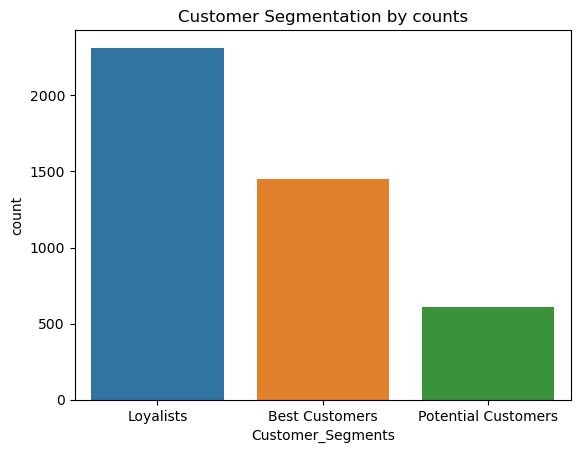

In [141]:
sns.countplot(data=rfm_table, x= 'Customer_Segments', order= rfm_table['Customer_Segments'].value_counts().index)
plt.title('Customer Segmentation by counts')
plt.show()

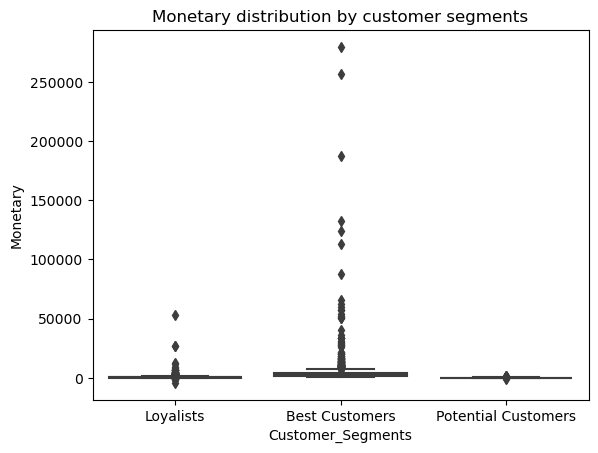

In [142]:
sns.boxplot(data = rfm_table, x = rfm_table['Customer_Segments'], y = rfm_table['Monetary'])
plt.title('Monetary distribution by customer segments')
plt.show()

In [143]:
rfm_table.to_excel('RFM Analysis.xlsx')

In [144]:
customer_data.to_excel('RFMO.xlsx')